# Audi_used_car_ML
# Md. Rafsan Jamil

# Import Libraries

In [2]:
# required libraries for data analysis
import pandas as pd
import numpy as np

# required libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
# required libraries to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context("talk")

# Dataset information

The data set contains information of price, transmission, mileage, fuel type, year, model, miles per gallon (mpg), and engineSize.


Target Variable:
price: Selling price of the cars


Features:

model: list of the Ford cars

year: when the car was made

transmission: transmission adapts the output of the internal combustion engine to the drive wheels

mileage: the mileage of a vehicle is the number of miles that it can travel using one gallon or litre of fuel

fuelType: different fuels a vehicle may use

mpg: miles per gallon the vehicle can travel

engineSize: engine size is the volume of fuel and air that can be pushed through a car's cylinders

# Load Dataset

In [3]:
# import the data
# read a csv file as pandas DataFrame
df = pd.read_csv("audi.csv")

# check the first 5 rows
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0,audi


In [5]:
df.info

<bound method DataFrame.info of       model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Make  
0             1.4  audi  
1             2.0  audi  
2             1.4  audi  
3             2.0  audi

In [6]:
df.describe

<bound method NDFrame.describe of       model  year  price transmission  mileage fuelType  tax   mpg  \
0        A1  2017  12500       Manual    15735   Petrol  150  55.4   
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2   
2        A1  2016  11000       Manual    29946   Petrol   30  55.4   
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3   
4        A3  2019  17300       Manual     1998   Petrol  145  49.6   
...     ...   ...    ...          ...      ...      ...  ...   ...   
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6   
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6   
10665    A3  2020  17199       Manual      609   Petrol  150  49.6   
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9   
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9   

       engineSize  Make  
0             1.4  audi  
1             2.0  audi  
2             1.4  audi  
3             2.0  au

In [9]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [10]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Make'],
      dtype='object')

In [11]:
pivot_1=df.pivot_table(values='price', index='model',columns='year', aggfunc='mean')
pivot_1

year,1997,1998,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
model,,,,,,,,,,,,,,,,,,,,,
A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6302.000000,8090.761905,8745.982759,10060.084746,11245.778378,12233.848739,13445.322581,15469.126582,21200.417840,22781.266667
A2,NaN,NaN,NaN,2490.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,NaN,4999.0,NaN,1490.0,4689.0,2455.0,3880.0,4759.333333,3748.75,4413.636364,...,6532.111111,7561.307692,10360.278689,11220.919192,12246.957447,14685.982323,17382.104396,20557.673913,23551.235294,26276.702128
A4,NaN,NaN,NaN,NaN,1699.0,3725.0,4453.6,3888.333333,4795.00,6995.000000,...,8949.777778,9641.000000,9826.410256,11542.862745,12951.621951,15239.768730,18224.608108,21412.967213,27663.864023,35607.933333
A5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6995.00,6095.000000,...,9862.800000,9361.375000,11739.592593,13001.923077,15679.315789,17938.644231,22115.565517,25175.903226,29437.778125,31704.426667
A6,NaN,NaN,NaN,2495.0,8995.0,NaN,8750.0,3528.333333,2490.00,NaN,...,7722.500000,10155.285714,11815.222222,13726.951220,16447.500000,17952.753846,20724.240741,25446.693548,33582.776119,39498.571429
A7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12534.750000,NaN,15146.857143,17633.363636,21323.000000,23003.666667,25674.476190,34375.916667,39828.085714,44974.000000
A8,4650.0,NaN,NaN,NaN,NaN,NaN,5595.0,NaN,NaN,NaN,...,9995.000000,12908.666667,17125.333333,18394.000000,20593.600000,23849.857143,32946.076923,37575.325000,43315.032258,55627.500000
Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18332.250000,19045.736585,20037.697248,24135.907193,27119.347826


<Figure size 2000x1500 with 0 Axes>

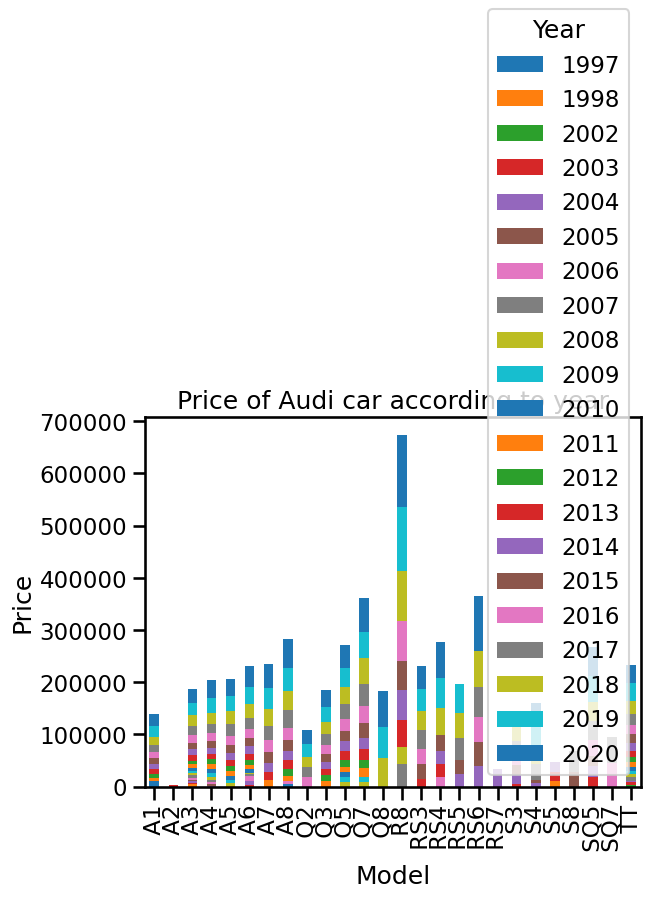

In [12]:
plt.figure(figsize=(20, 15))
pivot_1.plot(kind='bar',stacked=True)
plt.title('Price of Audi car according to year')
plt.xlabel('Model')
plt.ylabel('Price')
plt.legend(title='Year')
plt.show()

In [13]:
pivot_2=df.pivot_table(values='price', index='fuelType',columns='engineSize', aggfunc='mean')
pivot_2

engineSize,0.0,1.0,1.2,1.4,1.5,1.6,1.8,1.9,2.0,2.5,2.7,2.9,3.0,3.2,4.0,4.1,4.2,5.2,6.3
fuelType,,,,,,,,,,,,,,,,,,,
Diesel,31557.125000,NaN,NaN,2490.000000,27950.000000,15919.578246,NaN,2556.25,20590.419882,2229.666667,5826.666667,52995.00,36030.177355,NaN,58259.234043,20497.0,18642.500000,NaN,NaN
Hybrid,NaN,NaN,NaN,16878.000000,NaN,NaN,NaN,NaN,46600.083333,NaN,NaN,NaN,32998.000000,NaN,NaN,NaN,NaN,NaN,NaN
Petrol,30293.317073,16069.050179,10195.612903,15802.301648,24344.282638,4940.333333,14775.531746,NaN,26557.257161,37903.155172,NaN,56504.75,31752.446667,7236.0,48317.850000,NaN,26235.217391,106795.217391,32000.0


In [14]:
print(df["fuelType"].value_counts())

print(type(df["fuelType"].value_counts()))

df_fuelType = pd.DataFrame(df["fuelType"].value_counts())

display(df_fuelType.head())
print(df_fuelType.index)
print(df_fuelType.columns)

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64
<class 'pandas.core.series.Series'>


,fuelType
Diesel,5577
Petrol,5063
Hybrid,28


Index(['Diesel', 'Petrol', 'Hybrid'], dtype='object')
Index(['fuelType'], dtype='object')


In [15]:
df_fuelType = pd.DataFrame(df['fuelType'].value_counts())
df_fuelType = df_fuelType.reset_index()
df_fuelType = df_fuelType.rename(columns = {'index':'fuelType',
                                           'fuelType':'no_of_cars'})
df_fuelType['% of cars'] = (df_fuelType['no_of_cars']/df.shape[0])*100
df_fuelType

,fuelType,no_of_cars,% of cars
0,Diesel,5577,52.277840
1,Petrol,5063,47.459693
2,Hybrid,28,0.262467


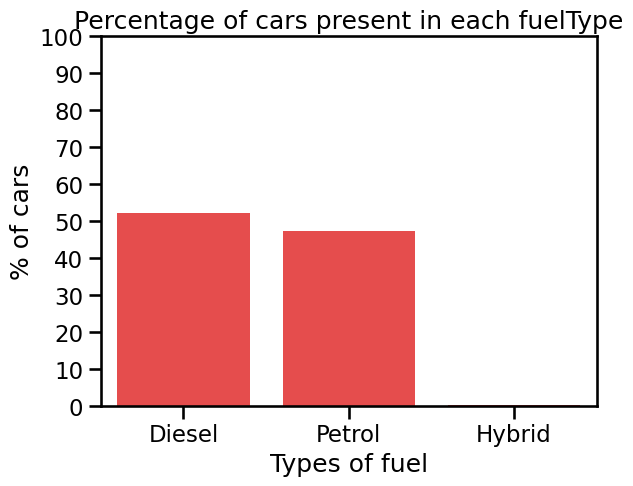

In [16]:
sns.barplot(x="fuelType", 
            y="% of cars", 
            data=df_fuelType, 
            color="red",
            alpha=0.8)

plt.xlabel("Types of fuel")
plt.ylabel("% of cars")
plt.title("Percentage of cars present in each fuelType")

plt.yticks(np.arange(0,101,10))

plt.show()

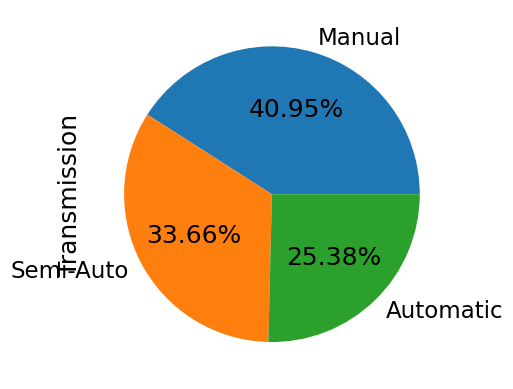

In [17]:
df['transmission'].value_counts().plot.pie(autopct = '%.2f%%')
plt.ylabel('Transmission')
plt.show()

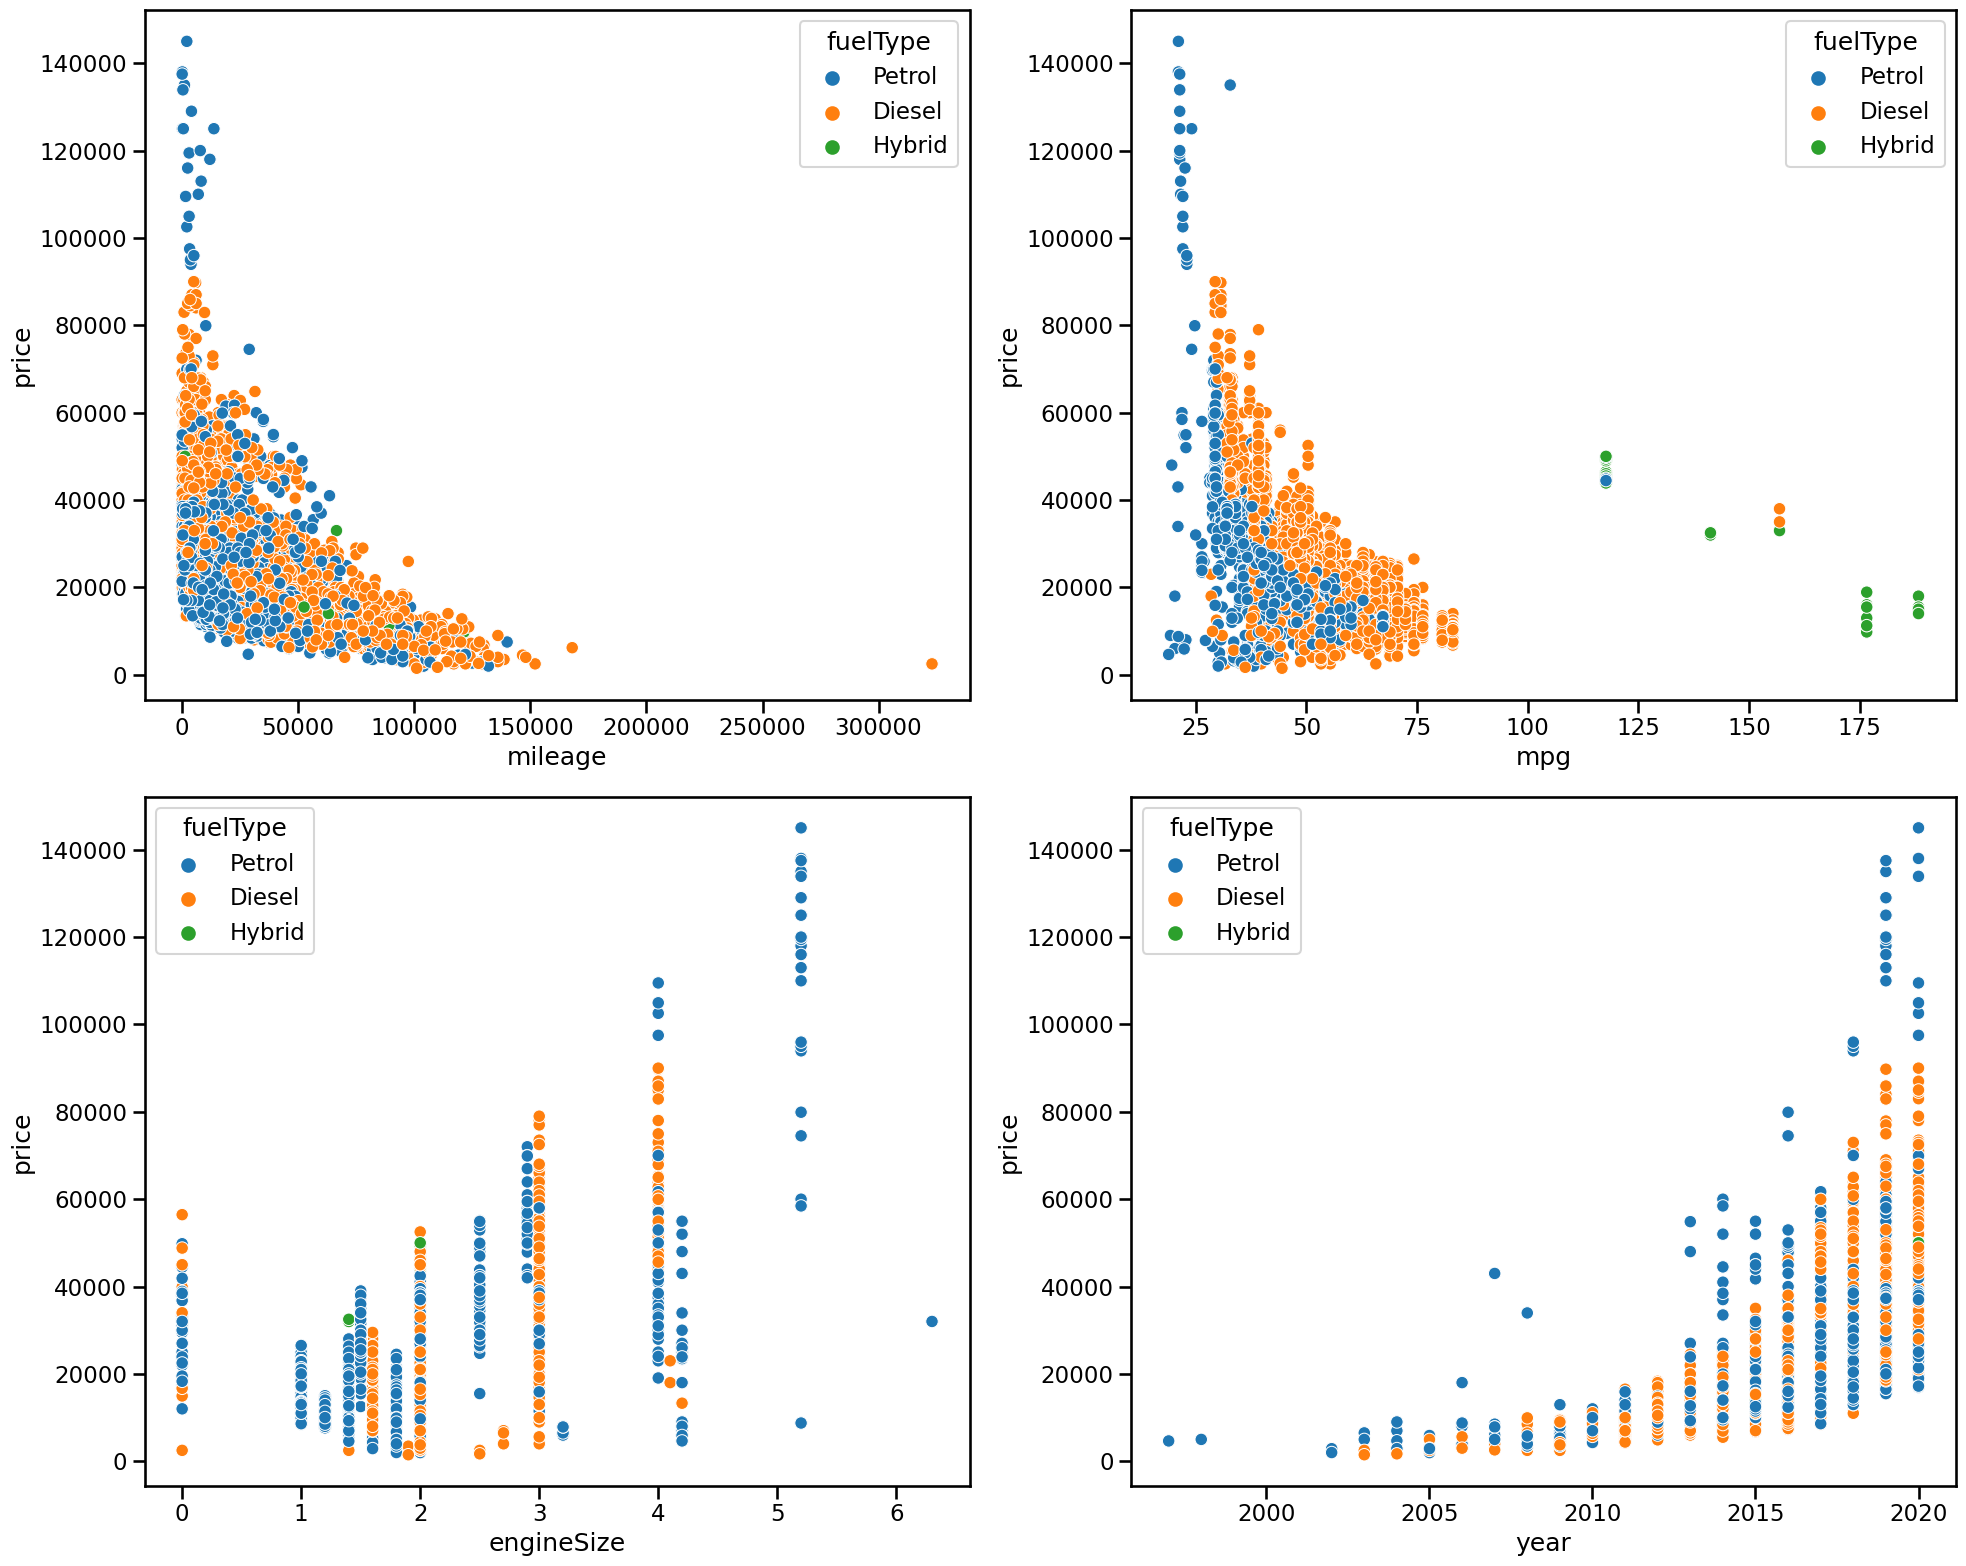

In [20]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 4)
sns.scatterplot(x="year", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

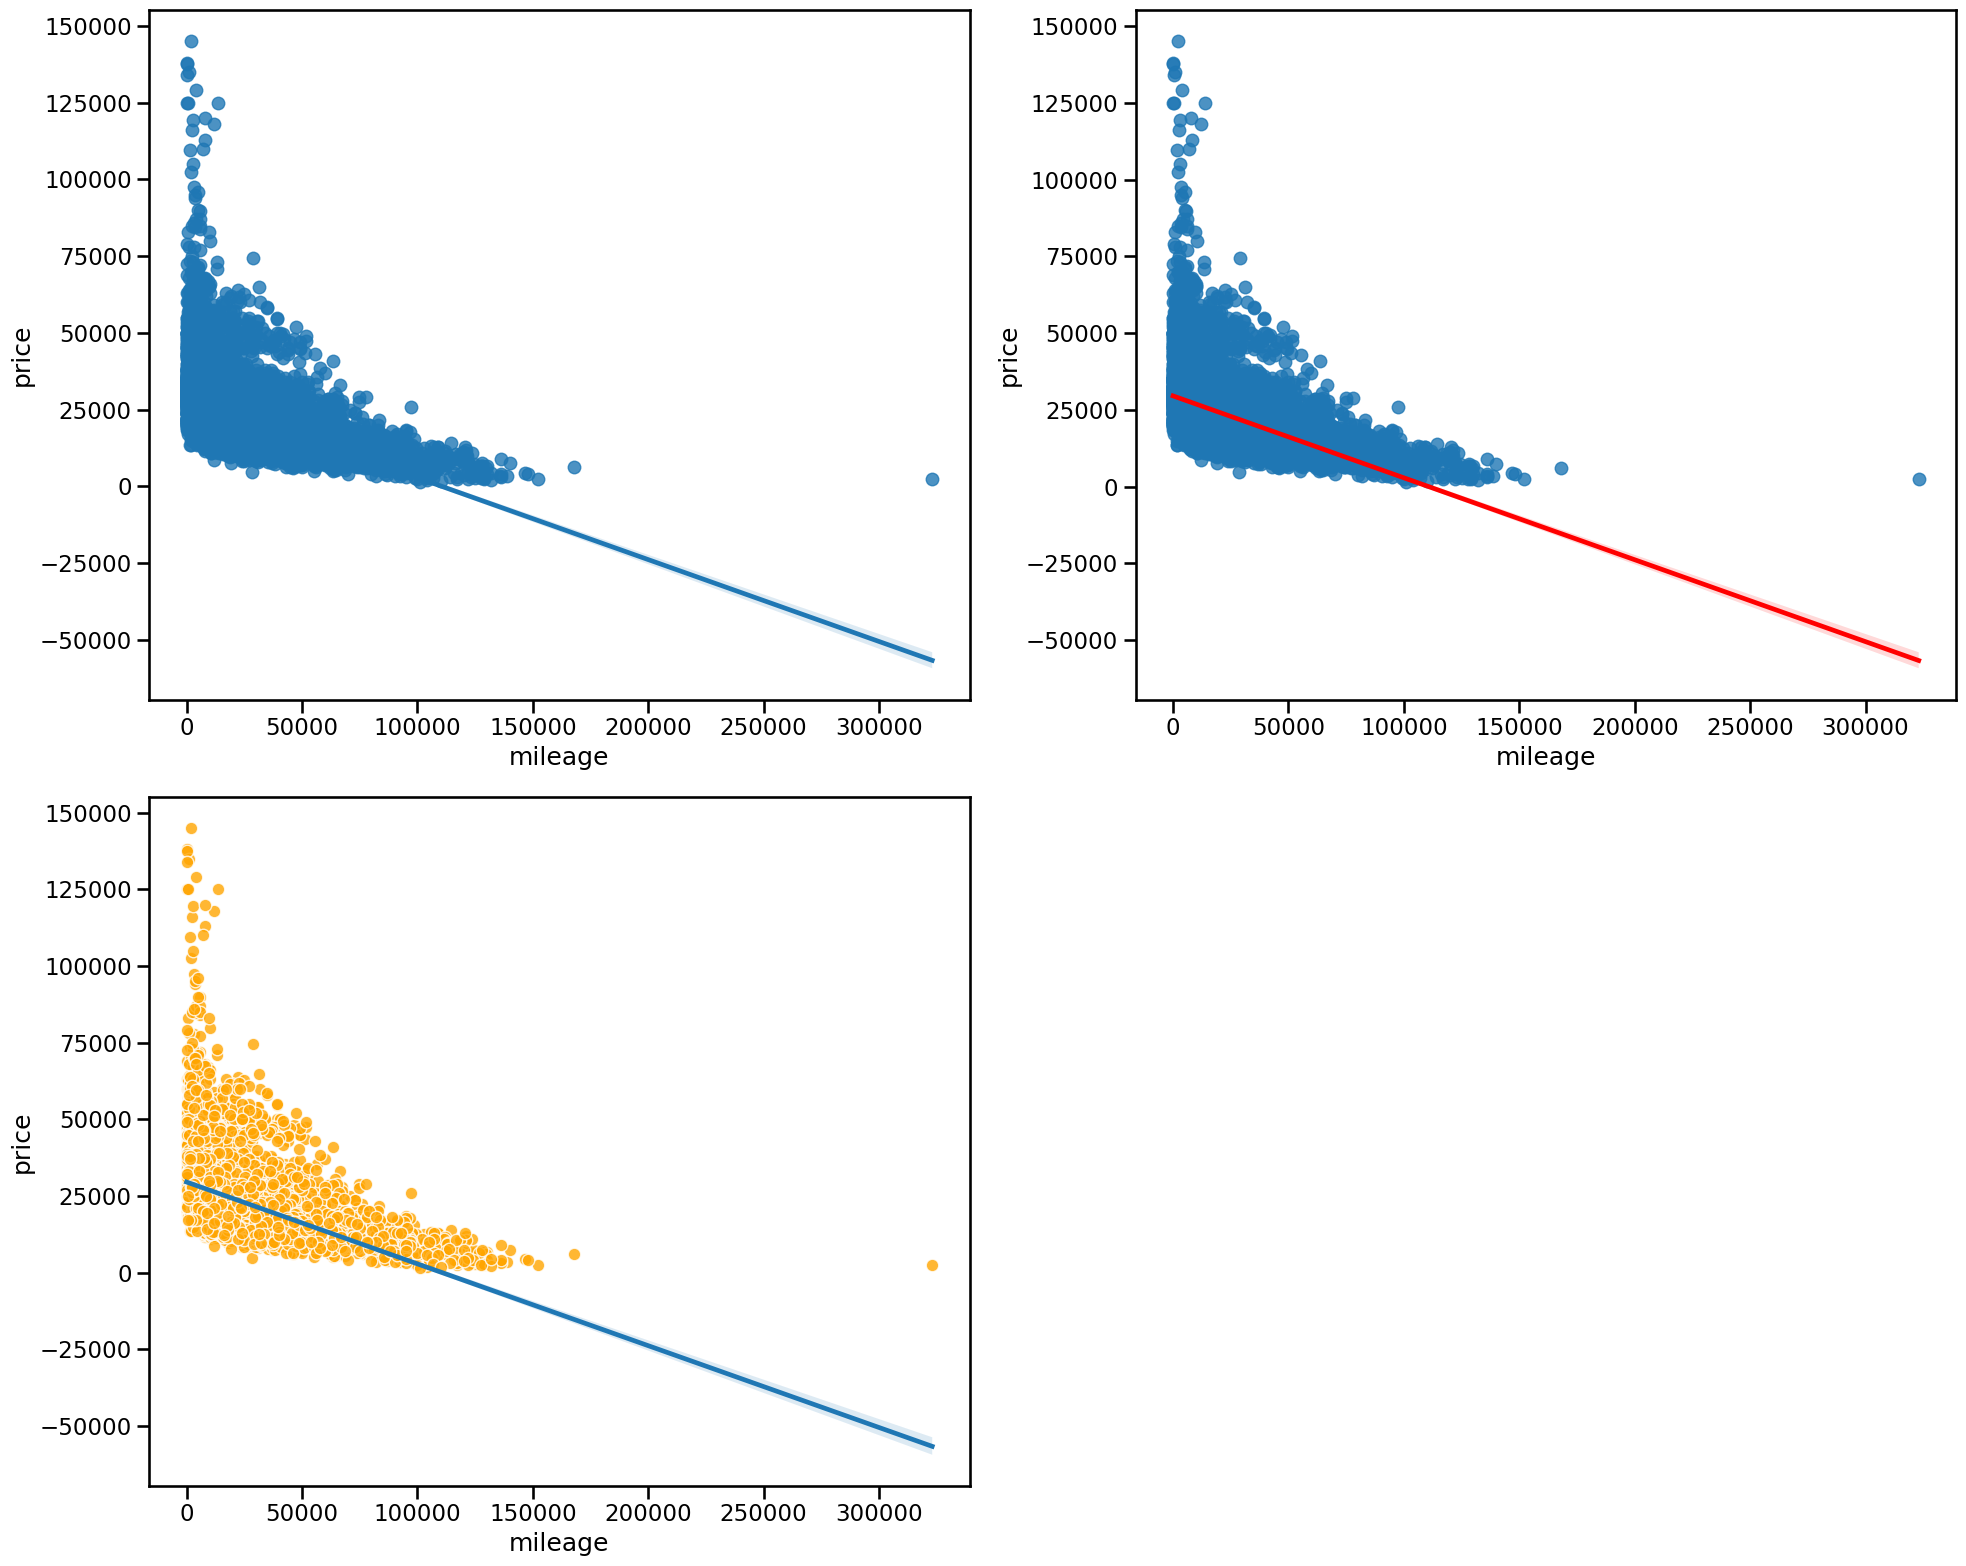

In [21]:
# Addding trend line
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.regplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"red"})

plt.subplot(2, 2, 3)
sns.regplot(x="mileage", y="price", data=df, scatter_kws={"color":"orange", "edgecolor":"white"})

plt.tight_layout()
plt.show()

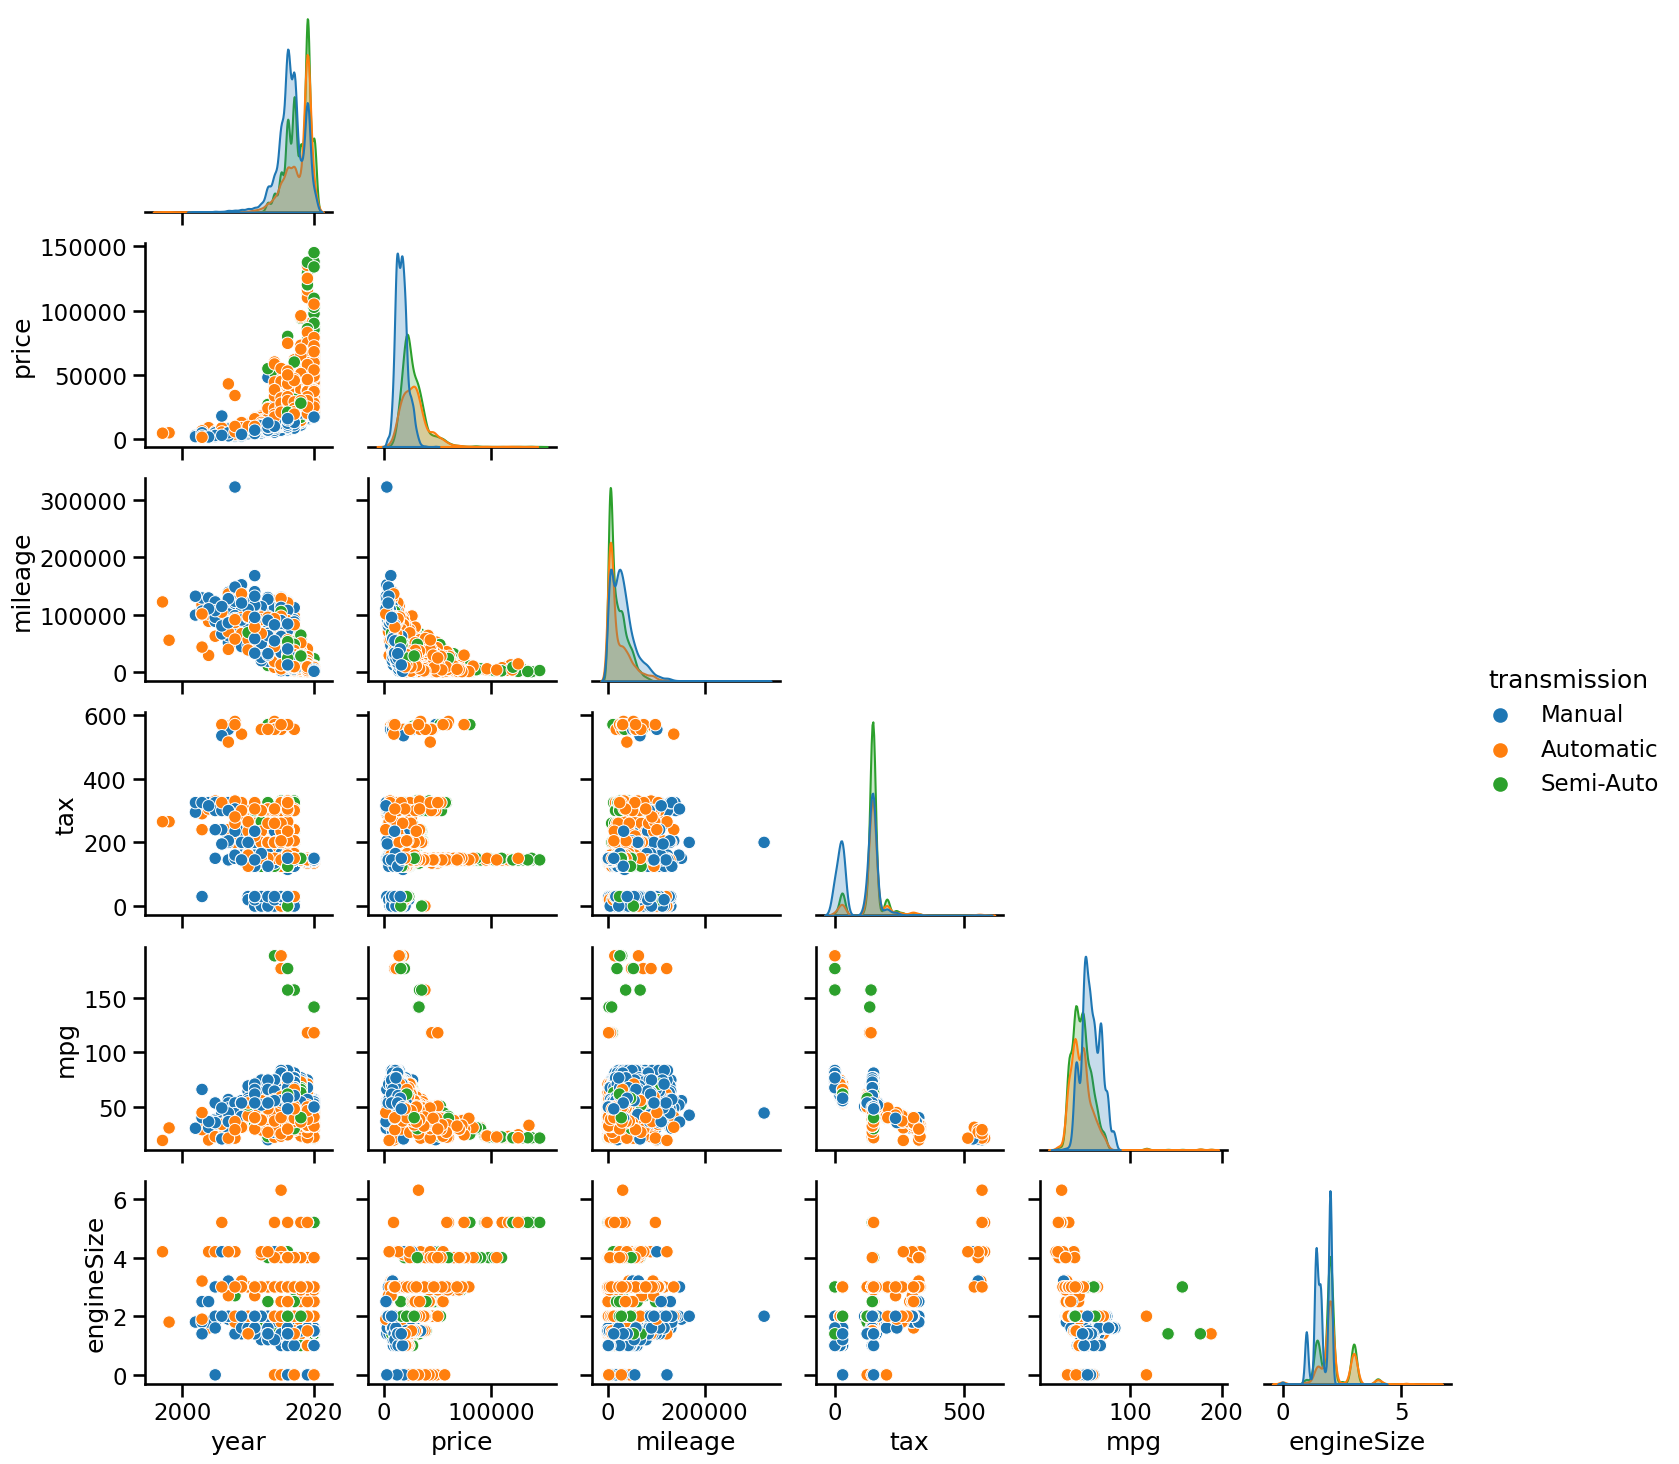

In [22]:
# sns.pairplot(df, corner=True)
sns.pairplot(df, corner=True, hue="transmission")

In [23]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


<Axes: >

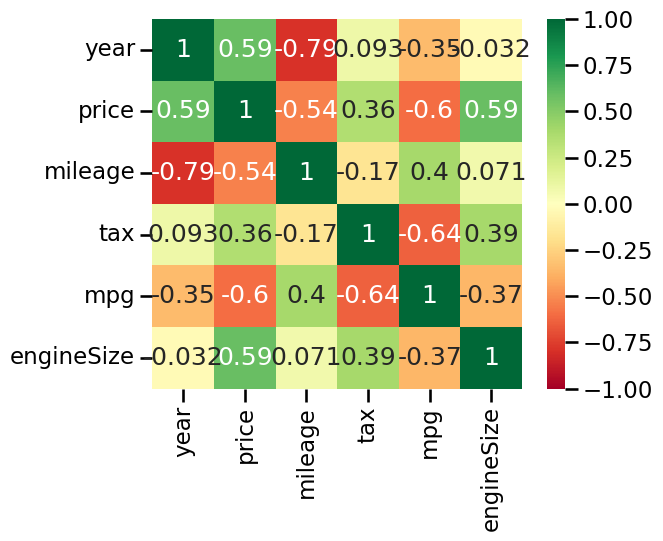

In [24]:
sns.heatmap(df.corr(), square=True, vmax=1.0, vmin=-1.0, cmap="RdYlGn", annot=True)

In [25]:
# Creating mask
correlation_matrix = df.corr()
display(correlation_matrix)

mask = np.zeros_like(correlation_matrix)
print(mask)

mask[np.triu_indices_from(mask)] = True
print(mask)

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1.]]


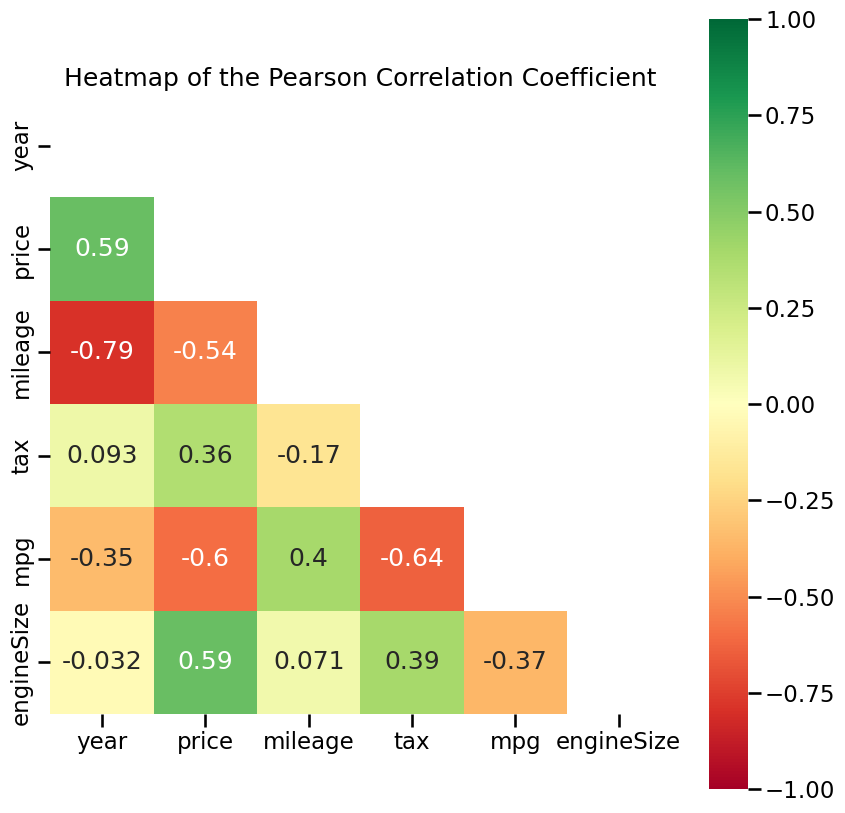

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, 
            square=True,
            vmax=1.0, vmin=-1.0,
            cmap="RdYlGn",
            annot=True,
            mask=mask)

plt.title("Heatmap of the Pearson Correlation Coefficient")
plt.show()

# Dealing with Categorical Variables

In [13]:
print(df['transmission'].unique())
print(len(df['transmission'].unique()))
display(df['transmission'].value_counts())

['Manual' 'Automatic' 'Semi-Auto']
3


Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [14]:
print(df['fuelType'].unique())
print(len(df['fuelType'].unique()))
display(df['fuelType'].value_counts())


['Petrol' 'Diesel' 'Hybrid']
3


Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

# One Hot Encoding

One-hot encoding is applied in the 'transmission' & 'fuelType' features. Because the features aren't ordinal and the number of categorical feature is less as it's shown above

In [27]:
df_transmission = pd.get_dummies(df[['transmission']])
display(df_transmission.head())

,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [28]:
df_fuelType = pd.get_dummies(df[['fuelType']])
display(df_fuelType.head())

,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [29]:
print(df['model'].unique())
print(len(df['model'].unique()))
display(df['model'].value_counts())

[' A1' ' A6' ' A4' ' A3' ' Q3' ' Q5' ' A5' ' S4' ' Q2' ' A7' ' TT' ' Q7'
 ' RS6' ' RS3' ' A8' ' Q8' ' RS4' ' RS5' ' R8' ' SQ5' ' S8' ' SQ7' ' S3'
 ' S5' ' A2' ' RS7']
26


 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

# Label Encoding

In [30]:
LE = LabelEncoder()

df['model'] = LE.fit_transform(df['model'])

display(df.sample(5))

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
9622,2,2012,5995,Manual,46000,Petrol,205,40.9,1.6,audi
6369,11,2016,34750,Automatic,16828,Diesel,200,47.9,3.0,audi
1711,2,2016,10498,Manual,68294,Diesel,0,74.3,1.6,audi
2453,10,2016,18737,Semi-Auto,49553,Diesel,200,47.1,2.0,audi
6164,4,2019,31970,Automatic,4015,Diesel,145,48.7,2.0,audi


In [31]:
df = pd.get_dummies(df, drop_first=True)
display(df.sample(5))

,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
115,5,2017,19800,42071,30,61.4,2.0,0,0,0,0
8060,25,2015,14900,34889,30,62.8,2.0,1,0,0,0
146,3,2014,11950,60604,20,67.3,2.0,1,0,0,0
6988,11,2017,47000,45000,145,39.2,4.0,0,1,0,0
7657,10,2020,37444,3000,145,32.1,2.0,0,0,0,1


# Separating the features and target variable

In [43]:
target = ['price']

X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(10668, 10) (10668, 1)


# Create train and test set

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8534, 10) (2134, 10) (8534, 1) (2134, 1)


# Training with Linear Regression

In [34]:
model = LinearRegression()
model = model.fit(X_train, y_train)

# Linear Regression Coefficients and intercept

In [35]:
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)


,features,coefficients
6,transmission_Manual,-1321.893860
4,mpg,-306.934012
7,transmission_Semi-Auto,-282.788557
9,fuelType_Petrol,-244.810772
3,tax,-28.623156
2,mileage,-0.088966
0,model,212.912197
1,year,1855.807188
5,engineSize,9528.937786
8,fuelType_Hybrid,38040.589684


In [36]:
model.intercept_

array([-3718094.91232072])

# Prediction

In [37]:
y_pred = model.predict(X_test)

# Prediction Error

In [38]:
# mean absolute error
MAE = mean_absolute_error(y_test, y_pred)
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test, y_pred)
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test, y_pred, squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test, y_pred) 
print("coefficient of determination = ", r_squared)

mean absolute error =  3319.5486549018656
mean squared error =  27843090.159057304
root mean squared error =  5276.655205625748
coefficient of determination =  0.815766674646192


# Comparison between the actual and predicted target variable through visualization

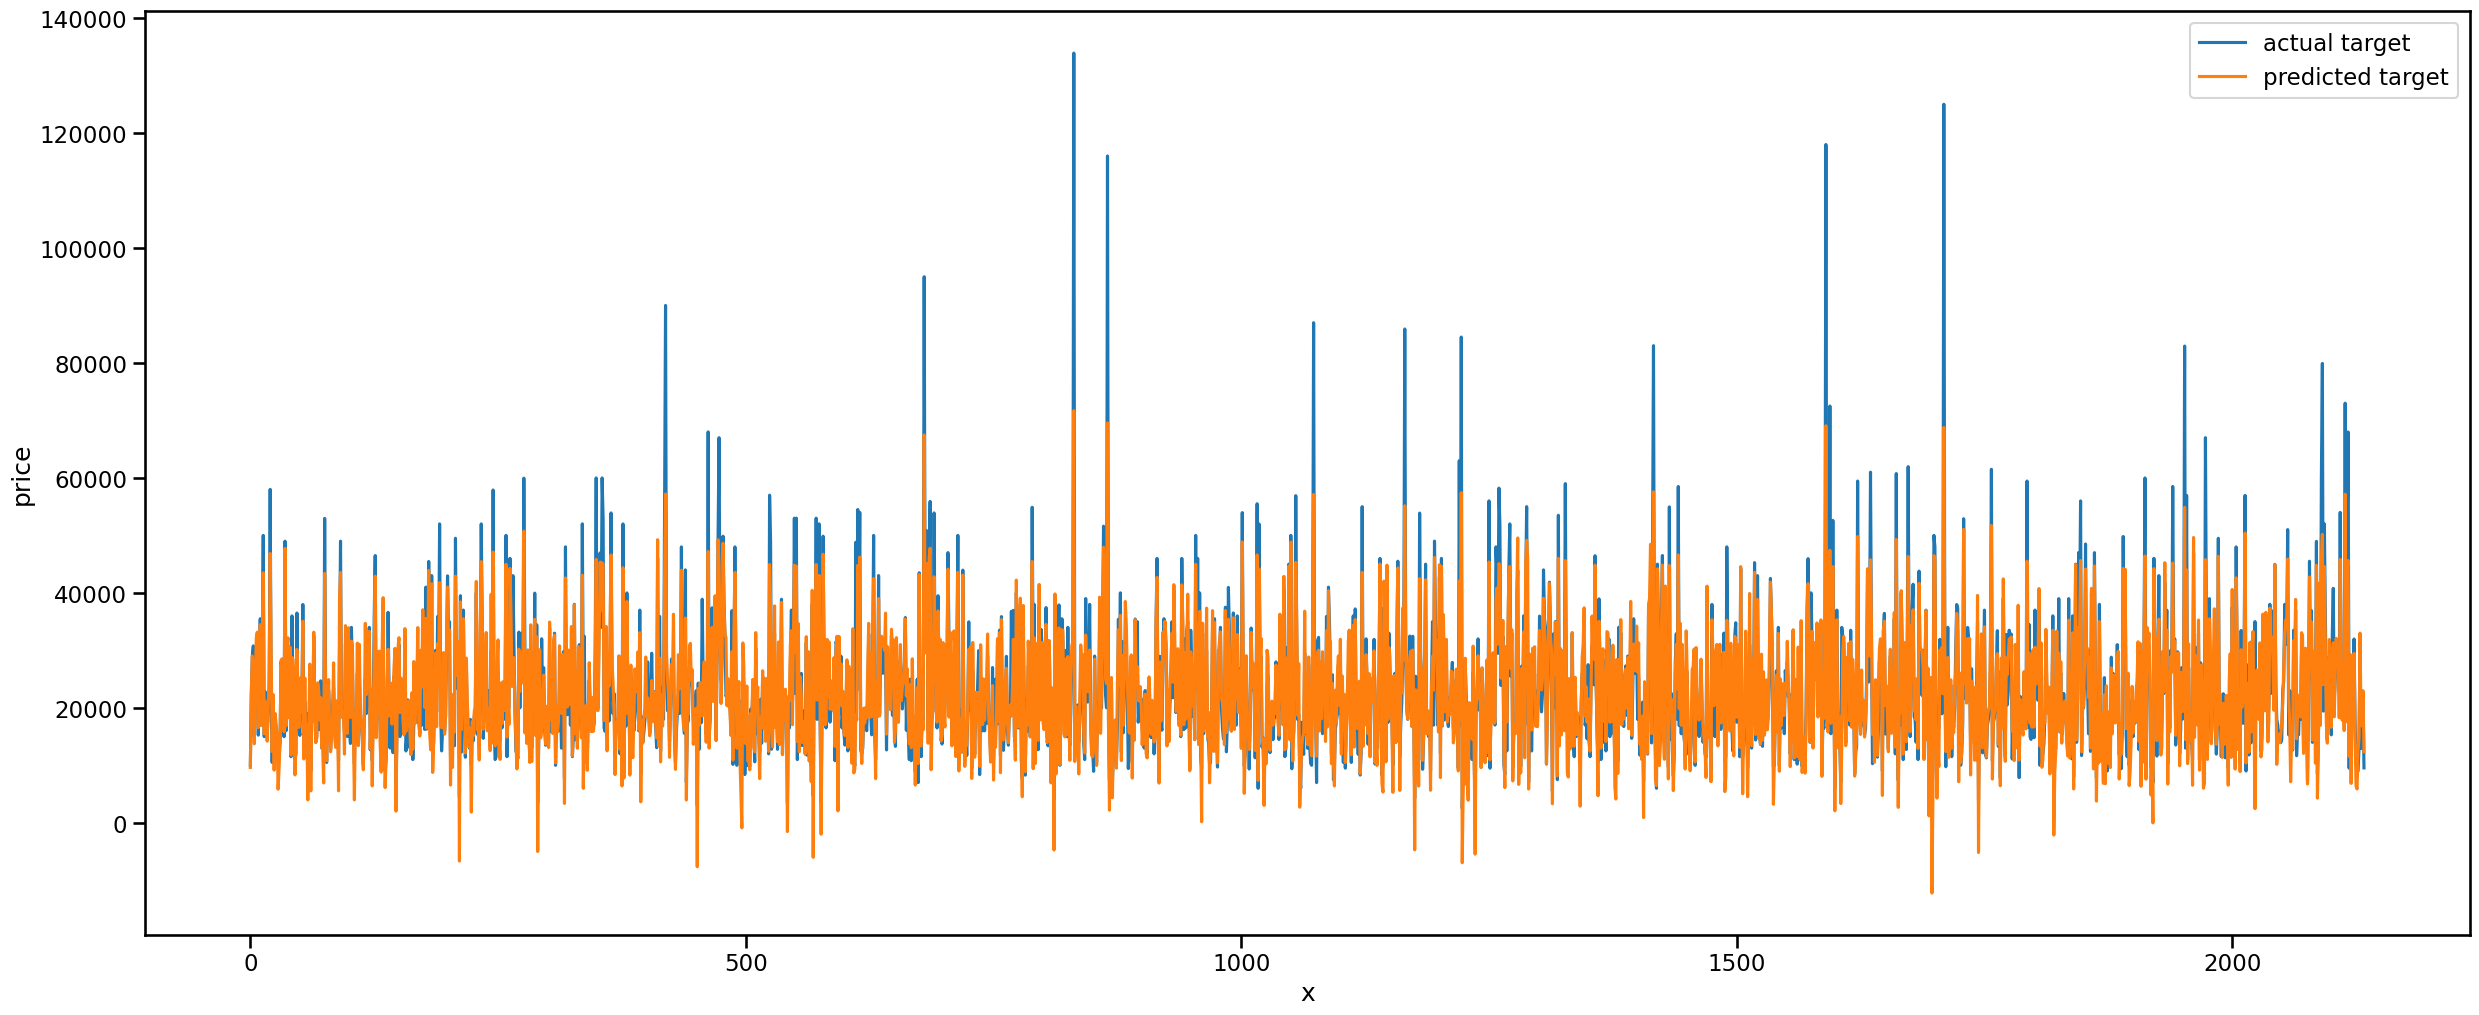

In [40]:

y_test['pred'] = y_pred
y_test['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='price', data=y_test, label='actual target')
sns.lineplot(x='x', y='pred', data=y_test, label='predicted target')
plt.show()

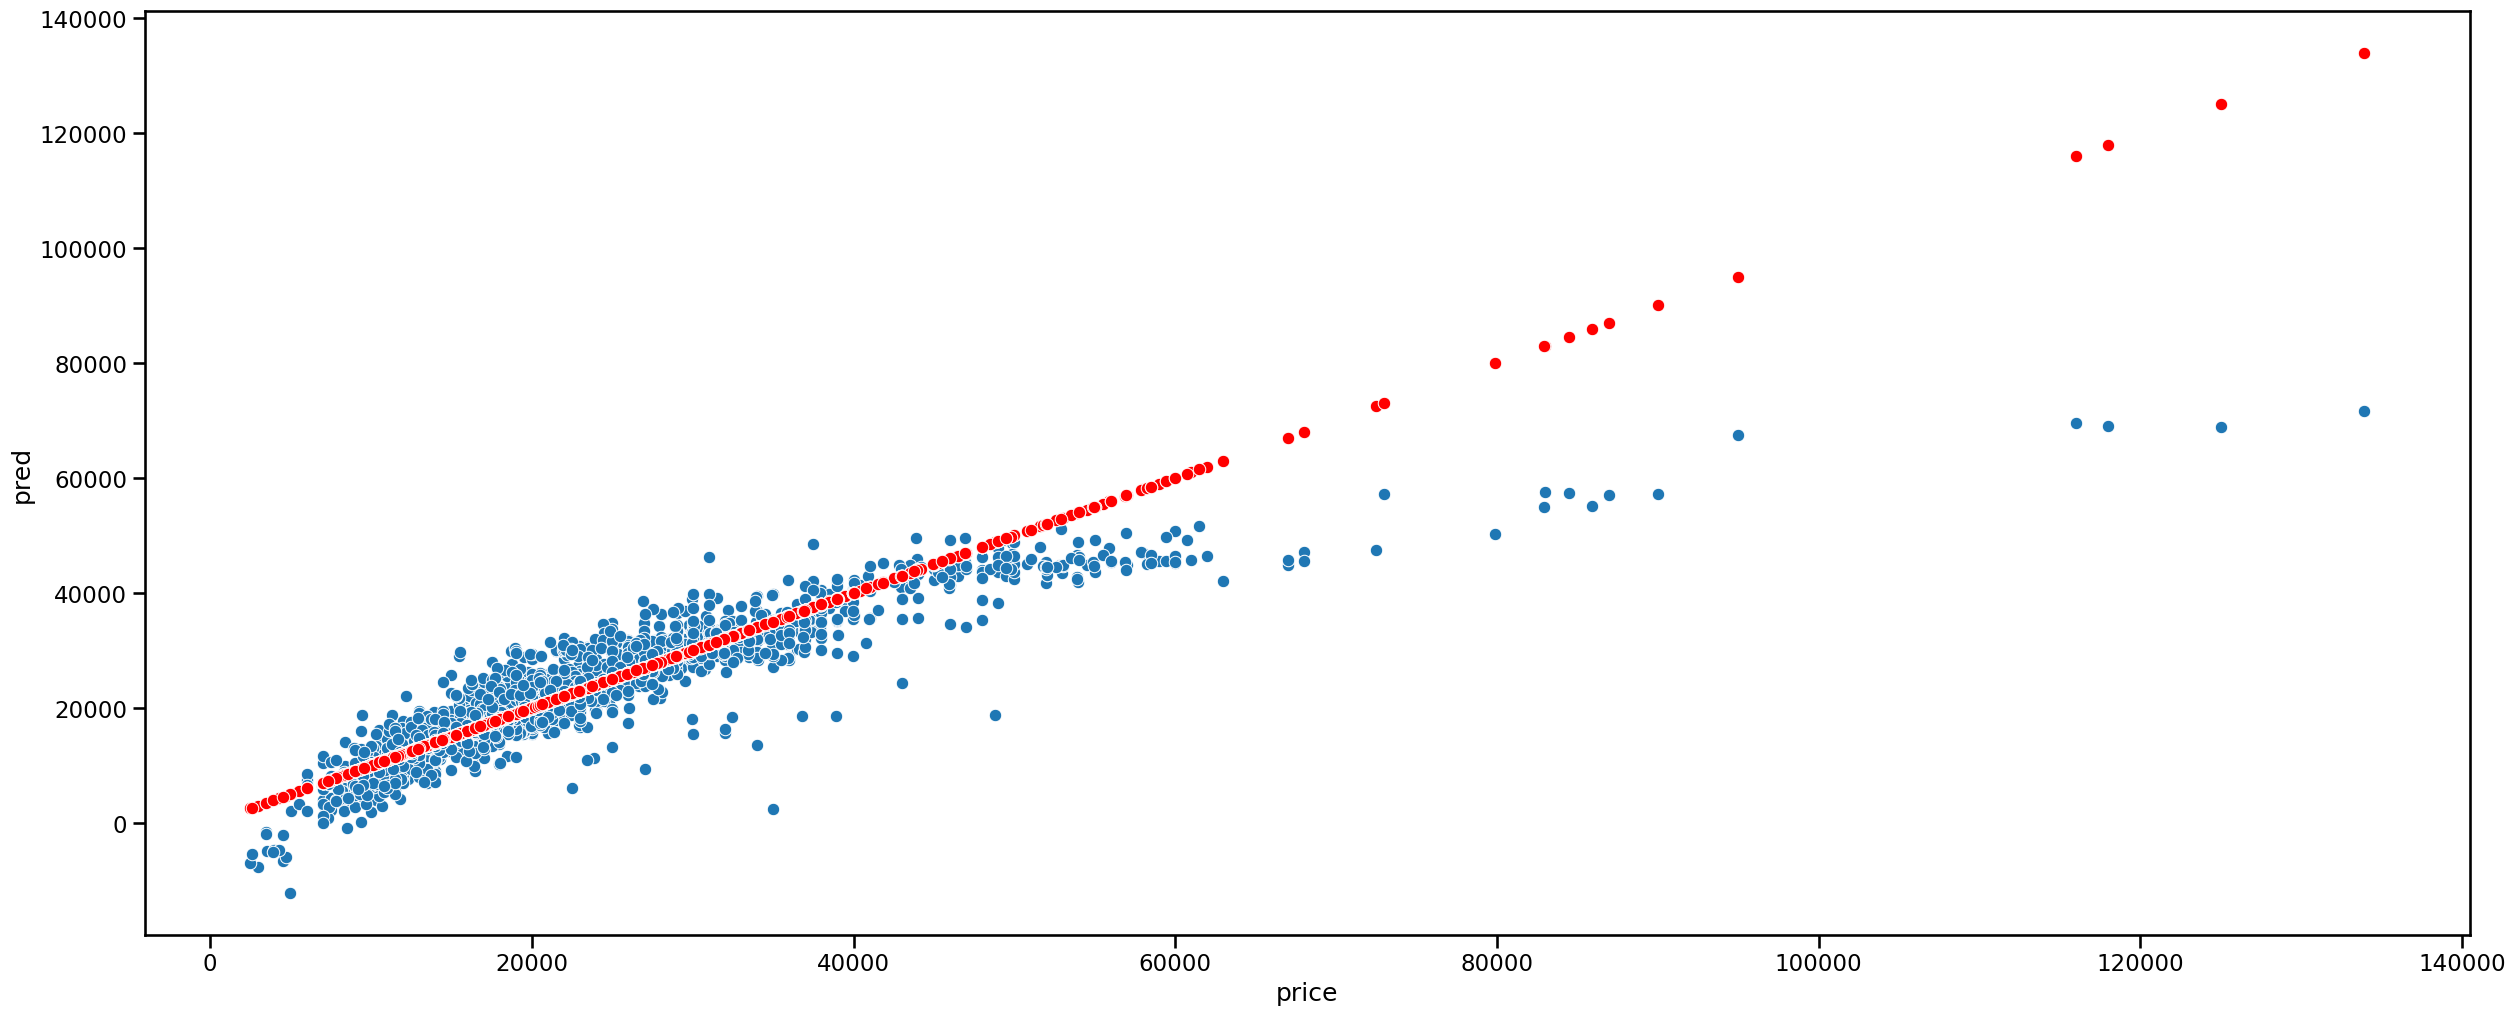

In [41]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='price', y='pred', data=y_test)

sns.scatterplot(x='price', y='price', data=y_test, color='red')
plt.show()